<img style="float: left;" src="attachment:D2Klogo.png" width="20%"> 

<center>

# Welcome to COMP 680 #
### Statistics for Computing and Data Science ###

### Homework 3 ###

In [4]:
### standard imports
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
%matplotlib inline  
plt.style.use('fivethirtyeight')
plt.rcParams["patch.force_edgecolor"] = True
import seaborn as sns

import random

##  HW Questions Start Here

For Question 1 - 5, you will work with US Census Data (Did you fill out 2020 Census?)

Read the US Census Data set `nc-est2020-agesex-res.csv` information [here](https://www2.census.gov/programs-surveys/popest/technical-documentation/file-layouts/2010-2019/nc-est2019-agesex-res.pdf), make sure you understand the data fully, what is each row and each column etc.

First, let's read in the data, save as a dataframe and select some useful columns:

In [5]:
full = pd.read_csv('nc-est2020-agesex-res.csv')
full

,SEX,AGE,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015,POPESTIMATE2016,POPESTIMATE2017,POPESTIMATE2018,POPESTIMATE2019,POPESTIMATE2020
0,0,0,3944153,3944160,3951495,3963264,3926731,3931411,3954973,3984144,3963268,3882437,3826908,3762227,3735010
1,0,1,3978070,3978090,3957904,3966768,3978210,3943348,3949559,3973828,4003586,3981864,3897917,3842257,3773884
2,0,2,4096929,4096939,4090799,3971498,3980139,3993047,3960015,3967672,3992657,4021261,3996742,3911822,3853025
3,0,3,4119040,4119051,4111869,4102429,3983007,3992839,4007852,3976277,3984985,4009060,4035053,4009037,3921526
4,0,4,4063170,4063186,4077511,4122252,4112849,3994539,4006407,4022785,3992241,4000394,4021907,4045996,4017847
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,2,97,53582,53605,54166,57127,59226,60675,62415,68627,69729,76313,82046,84349,85452
302,2,98,36641,36675,37567,40081,42573,43869,45899,46622,52146,53004,57386,62429,62702
303,2,99,26193,26214,26098,26997,29078,30681,32247,33567,34289,38508,39398,42288,45572
304,2,100,44202,44246,45079,47430,50051,52831,57125,60327,64400,67129,72068,76911,79772


From the full dataset, let's take out 4 columns of insterest: SEX, AGE, POPESTIMATE2010 and POPESTIMATE2019. Let's also rename the two columns with simple names '2010' and '2019':

In [6]:
partial = full[[ 'SEX', 'AGE', 'POPESTIMATE2010', 'POPESTIMATE2020']]
partial.rename(columns={'POPESTIMATE2010': '2010', 'POPESTIMATE2020':'2020'}, inplace=True)
partial.head()

C:\Users\Lucas\AppData\Local\Temp\ipykernel_17244\3678222092.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  partial.rename(columns={'POPESTIMATE2010': '2010', 'POPESTIMATE2020':'2020'}, inplace=True)


,SEX,AGE,2010,2020
0,0,0,3951495,3735010
1,0,1,3957904,3773884
2,0,2,4090799,3853025
3,0,3,4111869,3921526
4,0,4,4077511,4017847


***
**Question 1** Let's exclude age 999 and save the table as `no_999`. (why do we want to exclude it?)

In [7]:
# Filter out the 999 age values
no_999 = partial[partial['AGE'] != 999]
no_999

,SEX,AGE,2010,2020
0,0,0,3951495,3735010
1,0,1,3957904,3773884
2,0,2,4090799,3853025
3,0,3,4111869,3921526
4,0,4,4077511,4017847
...,...,...,...,...
300,2,96,75199,114037
301,2,97,54166,85452
302,2,98,37567,62702
303,2,99,26098,45572


In [8]:
# Make a descriptive table of the data
no_999.describe()

,SEX,AGE,2010,2020
count,303.000000,303.000000,3.030000e+02,3.030000e+02
mean,1.000000,50.000000,2.041763e+06,2.174813e+06
std,0.817847,29.202989,1.312164e+06,1.305231e+06
min,0.000000,0.000000,6.116000e+03,1.672800e+04
25%,0.000000,25.000000,9.967760e+05,1.434196e+06
50%,1.000000,50.000000,2.036371e+06,2.072391e+06
75%,2.000000,75.000000,2.294000e+06,2.437154e+06
max,2.000000,100.000000,4.645682e+06,4.835107e+06


***
**Question 2** Create one dataframe with 3 columns: Age, Male, Female, where Age should be 0 to 100, and Male and Female columns should have 2020 population of male and female for that age. Your dataframe should have 101 rows.

**Hint**: First create seperate dataframes for male and female then combine. You want to use df.reset_index(drop=True), otherwise index will be matched when combining and creating lots of `NaNs`.

In [9]:
# Filter the entries by SEX column, for man SEx==1
male = no_999[no_999['SEX']==1]
male = male.drop(['SEX','2010'], axis=1)
male = male.rename(columns={'2020':'Male'})
male

female = no_999[no_999['SEX']==2]
female = female.drop(['SEX','2010'], axis=1)
female = female.rename(columns={'2020':'Female', 'AGE':'Age'})
female

# Reset the index of the male and female DataFrames
male = male.reset_index(drop=True)
female = female.reset_index(drop=True)

In [10]:
# Combine the age_df, male, and female DataFrames
pop_2020 = pd.concat([male, female], axis=1)
pop_2020 = pop_2020.drop(['Age'], axis=1)
pop_2020 = pop_2020.rename(columns={'AGE':'Age'})
pop_2020

,Age,Male,Female
0,0,1908141,1826869
1,1,1926654,1847230
2,2,1968545,1884480
3,3,2004835,1916691
4,4,2052982,1964865
...,...,...,...
96,96,47168,114037
97,97,34292,85452
98,98,23467,62702
99,99,16728,45572


***
**Question 3**: Use visualization to show the population of male and female change over age: create two lines on the same plot to show population over age.

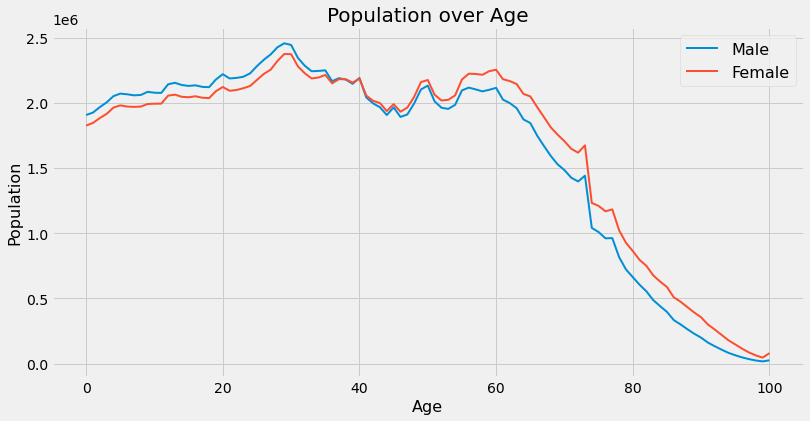

In [11]:
# Create a line plot of the population over age
# Don't show the age column
pop_2020.plot.line(x='Age', figsize=(12,6), lw=2)
plt.title('Population over Age', fontsize=20)
plt.xlabel('Age', fontsize=16)
plt.ylabel('Population', fontsize=16)
plt.legend(fontsize=16)
plt.show()


***
**Question 4** Add one column to your above dataframe call it `Percent Female`, and the value should be the percentage of female population as total for each age. 
- Use visualization to show change of percentage of female with age. What do you see?

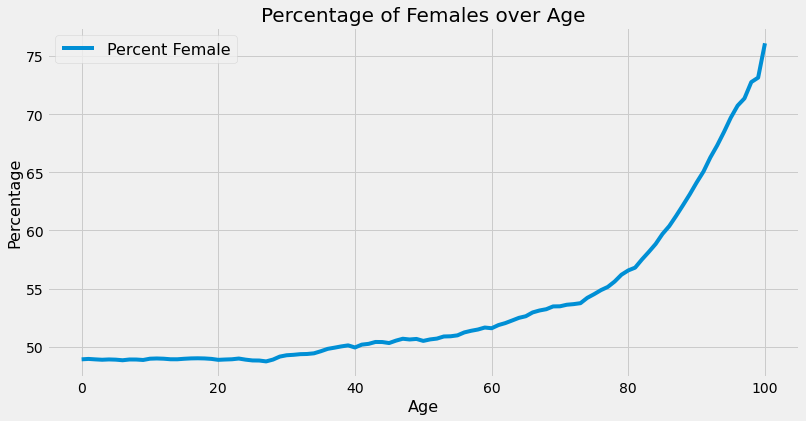

In [12]:
pop_2020['Percent Female'] = pop_2020['Female'] / (pop_2020['Female'] + pop_2020['Male']) * 100
pop_2020 

# Create a line plot of the percentage of females over age
# Don't show the age column
plt.figure(figsize=(12,6))
plt.plot(pop_2020['Age'], pop_2020['Percent Female'], label='Percent Female')
plt.title('Percentage of Females over Age', fontsize=20)
plt.xlabel('Age', fontsize=16)
plt.ylabel('Percentage', fontsize=16)
plt.legend(fontsize=16)
plt.grid(True)  # Add grid lines if desired
plt.show()




***
**Question 5**: Suppose population increase at a constant rate g each year, that is pop2021 = pop2020*(1+g). Use this assumption to calculate growth rate g from 2010 to 2020 for EACH age. Add to this column `Growth Rate` to the following dataframe `everyone`.

- Visualize the change of grouth rate ove age using a line plot.

In [13]:
everyone = no_999.loc[no_999['SEX']==0].drop(columns='SEX')
# calculate how many time the population have been multiplied by the factor (1 + g)^t
# where g is the growth rate and t is the number of years
# from 2010 to 2020 is 10 years, so t = 10
# we want to calculate g
# g = (pop2020/pop2010)^(1/t) - 1

# Add a column called 'Growth Rate' to the everyone DataFrame
everyone['Growth Rate'] = (everyone['2020'] / everyone['2010'])**(1/10) - 1
everyone


,AGE,2010,2020,Growth Rate
0,0,3951495,3735010,-0.005619
1,1,3957904,3773884,-0.004750
2,2,4090799,3853025,-0.005970
3,3,4111869,3921526,-0.004728
4,4,4077511,4017847,-0.001473
...,...,...,...,...
96,96,97259,161205,0.051828
97,97,68967,119744,0.056723
98,98,47086,86169,0.062297
99,99,32214,62300,0.068180


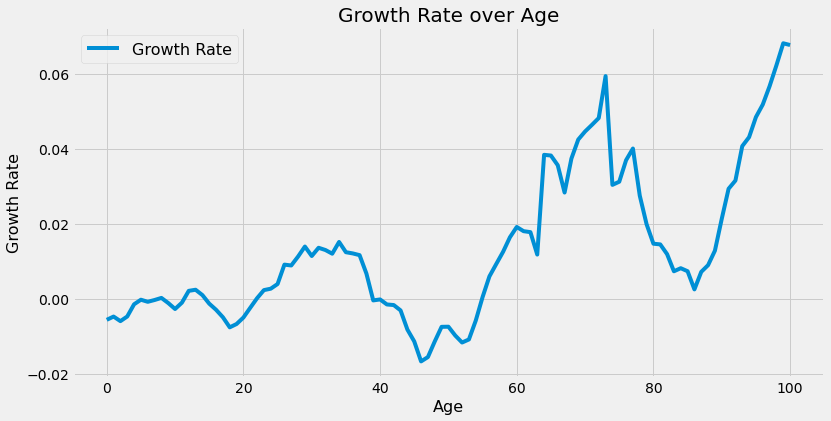

In [14]:
# visualize the growth rate over age
plt.figure(figsize=(12,6))
plt.plot(everyone['AGE'], everyone['Growth Rate'], label='Growth Rate')
plt.title('Growth Rate over Age', fontsize=20)
plt.xlabel('Age', fontsize=16)
plt.ylabel('Growth Rate', fontsize=16)
plt.legend(fontsize=16)
plt.grid(True)  # Add grid lines if desired
plt.show()


***
**Question 6**: Suppose the population distribution is throwing a fair die, which is a discrete uniform distribution. Complete the following simulation to show that Central Limit Theorem (CLT) still holds, i.e., show that sample mean is approximately normal for large sample size. However, sample median is not normal for large sample size, i.e., CLT only applies to sample mean, not sample median. 

**Note**: you need `replace=True` in generating random samples, i.e., assume the population is infinite.

In [15]:
# **Question 6**: Suppose the population distribution is throwing a fair die, which is a discrete uniform distribution. Complete the following simulation to show that Central Limit Theorem (CLT) still holds, i.e., show that sample mean is approximately normal for large sample size. However, sample median is not normal for large sample size, i.e., CLT only applies to sample mean, not sample median. 
# **Note**: you need `replace=True` in generating random samples, i.e., assume the population is infinite.

die = pd.DataFrame({'face': np.arange(1, 7)})
die

,face
0,1
1,2
2,3
3,4
4,5
5,6


In [16]:
pop_mean = np.mean(die['face'])
pop_median = np.median(die['face'])
pop_sd = np.std(die['face'])
[pop_mean, pop_median, pop_sd]

[3.5, 3.5, 1.707825127659933]

In [17]:
def sample_mean(sample_size):
    """
    function to simulate a sample mean
    sample_size is the sample size
    returns one sample mean
    """
    sample = np.random.choice(die['face'], size=sample_size, replace=True)
    return np.mean(sample)

In [18]:
# try out the function
sample_mean(100)

3.47

In [19]:
def sample_median(sample_size):
    """
    function to simulate a sample median
    sample_size is the sample size
    returns one sample median
    """
    sample = np.random.choice(die['face'], size=sample_size, replace=True)
    return np.median(sample)

In [20]:
# try out the function
sample_median(100)

4.0

In [21]:
def simu_stat(stat, sample_size, rep):
    """
    function to simulate a particular statistics multiple times
    stat is the function to calculate the statistic
    sample_size is the sample size
    rep is number of samples to draw
    returns list of simulated stats
    """
    boot_stats = []
    for i in np.arange(rep):
        boot_stats = np.append(boot_stats, stat(sample_size))
    return boot_stats

In [22]:
# try out the function
simu_stat(sample_mean, 100, 10)

array([3.5 , 3.64, 3.25, 3.66, 3.62, 3.6 , 3.25, 3.41, 3.76, 3.57])

Sample size:  1000
Population mean: 3.5
Average of sample means:  3.4998136
Population SD: 1.707825127659933
SD of sample means: 0.05428894044867702
SD by CLT: 0.05400617248673217


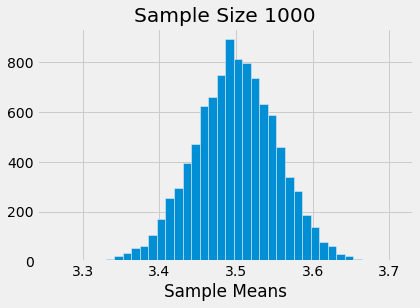

In [23]:
# simulate sample mean
# change the sample size n here to see different simulation results
sample_size = 1000
rep = 10000
stat = sample_mean
# call the function simu_stat
sample_means = simu_stat(stat, sample_size, rep)
plt.hist(sample_means, bins=40)
plt.xlabel('Sample Means')
plt.title('Sample Size ' + str(sample_size))
print("Sample size: ", sample_size)
print("Population mean:", pop_mean)
print("Average of sample means: ", np.mean(sample_means))
print("Population SD:", pop_sd)
print("SD of sample means:", np.std(sample_means))
print("SD by CLT:", pop_sd / np.sqrt(sample_size))

Sample size:  1000
Population median: 3.5
Average of sample median:  3.49415
Population SD: 1.707825127659933
SD of sample median: 0.4932451494946504
SD by CLT: 0.05400617248673217


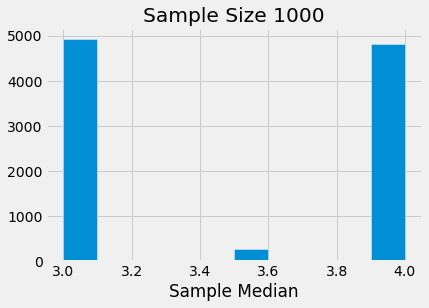

In [24]:
# simulate sample median
# change the sample size n here to see different simulation results
# for a large enough n, say 1000, does the histogram look normal to you?
sample_size = 1000
rep = 10000
stat = sample_median
# call the function simu_stat
sample_medians = simu_stat(stat, sample_size, rep)
plt.hist(sample_medians)
plt.xlabel('Sample Median')
plt.title('Sample Size ' + str(sample_size))
print("Sample size: ", sample_size)
print("Population median:", pop_median)
print("Average of sample median: ", np.mean(sample_medians))
print("Population SD:", pop_sd)
print("SD of sample median:", np.std(sample_medians))
print("SD by CLT:", pop_sd/np.sqrt(sample_size))

***
**Question 7**:
Let $X_1, \dots, X_n \overset{\text{i.i.d.}} \sim \text{Uniform}[\theta, 1]$ where $\theta$ is the unknown parameter and $0 < \theta < 1$. Find the MLE $\hat{\theta}$.

**Solution**:

$$
f(x_i; \theta) = 
\begin{cases}
\frac{1}{1-\theta} & \text{if } \theta \leq x_i \leq 1 \\
0 & \text{otherwise}
\end{cases}
$$

The likelihood function $ L(\theta; x_1, \dots, x_n) $ is the joint pdf of the observed data, considered as a function of $ \theta $:

$$
L(\theta; x_1, \dots, x_n) = \prod_{i=1}^{n} f(x_i; \theta)
$$

Given that $ X_1, \dots, X_n $ are i.i.d., we have:

$$
L(\theta; x_1, \dots, x_n) = \left(\frac{1}{1-\theta}\right)^n \cdot I(\theta \leq \min(x_1, \dots, x_n) \leq 1)
$$

where $ I(\cdot) $ is the indicator function that is 1 if the condition inside is true and 0 otherwise.

It's often convenient to work with the natural logarithm of $ L(\theta; x_1, \dots, x_n) $, known as the log-likelihood function, denoted $ l(\theta) $:

$$
l(\theta) = n \log\left(\frac{1}{1-\theta}\right) + \log(I(\theta \leq \min(x_1, \dots, x_n) \leq 1))
$$

To find the MLE $ \hat{\theta} $, we need to maximize $ l(\theta) $ with respect to $ \theta $. Note that the log-likelihood function is increasing in $ \theta $ when $ \theta \leq \min(x_1, \dots, x_n) $ (the indicator function is 1) and undefined otherwise. Therefore, the MLE $ \hat{\theta} $ is:

$$
\hat{\theta} = \min(x_1, \dots, x_n)
$$


***
**Question 8**:

Let $X_1, X_2, \cdots X_n \overset{\text{i.i.d.}} \sim \text{Uniform}(0, \theta)$. Define the two point estimate:

$$ \hat{\theta}^1 = \max \{X_1, X_2, \cdots X_n\} \quad \hat{\theta}^2 = 2 \bar{X}_n $$ 

Find the mean square error for both $\hat{\theta}^1$ and $\hat{\theta}^2$. Which one has the smaller MSE?

**Hint**: use MSE = $\text{bias}^2$ + variance

**Solution**:

**Solution for $\hat{\theta}_1$**

Firts, the PDF of $X_i$ is given by:

$$
f_{X_i}(x) =
\begin{cases}
\frac{1}{\theta} & \text{if } 0 \leq x \leq \theta \\
0 & \text{otherwise}
\end{cases}
$$

Now, the PDF of $ \hat{\theta}_1 $ is given by:

$$
f_{\hat{\theta}_1}(x) =
\begin{cases}
\frac{n x^{n-1}}{\theta^n} & \text{if } 0 \leq x \leq \theta \\
0 & \text{otherwise}
\end{cases}
$$

The Bias is given by:

$$
\begin{align}
\text{Bias}(\hat{\theta}_1) &= E(\hat{\theta}_1) - \theta \\
&= \int_{0}^{\theta} x \cdot \frac{n x^{n-1}}{\theta^n} dx - \theta \\
&= \frac{n}{n+1} \theta - \theta \\
&= -\frac{\theta}{n+1}
\end{align}
$$

The Variance is given by:

$$
\begin{align}
\text{Var}(\hat{\theta}_1) &= E(\hat{\theta}_1^2) - E(\hat{\theta}_1)^2 \\
&= \int_{0}^{\theta} x^2 \cdot \frac{n x^{n-1}}{\theta^n} dx - \left(\frac{n}{n+1} \theta\right)^2 \\
&= \frac{n}{n+2} \theta^2 - \left(\frac{n}{n+1} \theta\right)^2 \\
&= \frac{n}{(n+1)^2 (n+2)} \theta^2
\end{align}
$$

Therefore, the MSE is given by:

$$
\begin{align}
\text{MSE}(\hat{\theta}_1) &= \text{Bias}(\hat{\theta}_1)^2 + \text{Var}(\hat{\theta}_1) \\
&= \left(-\frac{\theta}{n+1}\right)^2 + \frac{n}{(n+1)^2 (n+2)} \theta^2 \\
&=\frac{2\theta^2}{(n+2)(n+1)}
\end{align}
$$

**Solution for $\hat{\theta}_2$**

The Bias is given by:

$$
\begin{align}
\text{Bias}(\hat{\theta}_2) &= E(\hat{\theta}_2) - \theta \\
&= 2 E(\bar{X}_n) - \theta \\
&= 2 \cdot \frac{\theta}{2} - \theta \\
&= 0
\end{align}
$$

The Variance is given by:

$$
\begin{align}
\text{Var}(\hat{\theta}_2) &= E(\hat{\theta}_2^2) - E(\hat{\theta}_2)^2 \\
&= 4 E(\bar{X}_n^2) - 0 \\
&= 4 \cdot \frac{\theta^2}{12} \\
&= \frac{\theta^2}{3}
\end{align}
$$

Therefore, the MSE is given by:

$$
\begin{align}
\text{MSE}(\hat{\theta}_2) &= \text{Bias}(\hat{\theta}_2)^2 + \text{Var}(\hat{\theta}_2) \\
&= 0 + \frac{\theta^2}{3} \\
&= \frac{\theta^2}{3}
\end{align}
$$

**Conclusion**

Therefore, $ \hat{\theta}_1 $ has the smaller MSE.



***
**Question 9**: The file `geysers.csv` has data on eruption times and waiting times between eruptions of the old faithful geyser at the [Yellowstone National Park](https://www.nps.gov/yell/index.htm). Consider this data as a random sample from the population, which is all eruption times in the future.

- Estimate the mean waiting time. 
- Use Central Limit Theorem, give a standard error and a 90% confidence interval for the mean waiting time.
- Estimate the median waiting time.
- Use Bootstrap, give a standard error and a 90% confidence interval for the median waiting time. 


In [26]:
geyser = pd.read_csv("geysers.csv")
geyser

,eruptions,waiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85
...,...,...
267,4.117,81
268,2.150,46
269,4.417,90
270,1.817,46


In [40]:
waiting_time = geyser['waiting']

In [62]:
mean_est = np.mean(waiting_time)
sample_size = geyser.shape[0]
# approx standard error by CLT
mean_est_se = np.std(waiting_time) / np.sqrt(sample_size)

# Print the results: mean and standard error
print("Mean estimate:", mean_est)
print("Standard error:", mean_est_se)

Mean estimate: 70.89503529411763
Standard error: 0.04986087350706303


In [63]:
import scipy.stats

alpha = 0.1  # 90% confidence interval
# get the normal percentile
z_95 = scipy.stats.norm.ppf(1 - alpha/2)
mean_ci_l = mean_est - z_95 * mean_est_se
mean_ci_u = mean_est + z_95 * mean_est_se
mean_ci = (mean_ci_l, mean_ci_u)

# Print the results: confidence interval
print("Mean estimate:", mean_est)
print("Mean 90% confidence interval:", mean_ci)


Mean estimate: 70.89503529411763
Mean 90% confidence interval: (70.81302145548658, 70.97704913274869)


In [64]:
median_est = np.median(waiting_time)
median_est

70.8970588235294

In [49]:
# bootstrap
random.seed = 2023
rep = 10000
boot_median = []

for i in range(rep):
    boot_sample = np.random.choice(waiting_time, size=sample_size, replace=True)
    median_est = np.median(boot_sample)
    boot_median = np.append(boot_median, median_est)

In [65]:
median_est_se = np.std(boot_median)

In [66]:
# bootstrap percentile interval
median_ci_l = np.percentile(boot_median, 5)
median_ci_u = np.percentile(boot_median, 95)
median_ci =(median_ci_l, median_ci_u)

In [68]:
print("Mean waiting time is: %.3f" % mean_est, "with standard error: %.3f" % mean_est_se)
print("90%% confidence interval for mean waiting time is: %.3f, %.3f"  % mean_ci)
print("Median waiting time is: %.3f" % median_est, "with standard error: %.3f" % median_est_se)
print("90%% confidence interval for median waiting time is: %.3f, %.3f" % median_ci)

Mean waiting time is: 70.895 with standard error: 0.050
90% confidence interval for mean waiting time is: 70.813, 70.977
Median waiting time is: 70.897 with standard error: 0.063
90% confidence interval for median waiting time is: 70.792, 71.002


***
**Question 10**: Let $X_1, \dots, X_n \overset{\text{i.i.d.}} \sim N(\mu=3, \sigma^2=1)$.  Let $\theta = e^\mu$. We know the maximum likelihood estimator(MLE) of $\mu$ is sample mean $\bar{X_n}$. It turns out that $\hat{\theta} = e^{\bar{X_n}}$ is the MLE of $\theta$. This is known as functional invariance of MLE: 

If $\hat{\theta}$ is the MLE for $\theta$, and $g(\theta )$ is the transformation of $\theta$ through a given function $g$, then the MLE for $\alpha = g(\theta)$ is $\hat{\alpha }=g(\hat {\theta })$.   

Create a dataset consisting of $n = 100$ observations. Use **both non-parametric and parametric bootstrap** to get the 95% confidence interval for $\theta$. Plot a histogram of the bootstrap replications for the parametric and non-parametric bootstraps to compare the estimates of the distribution of $\hat{\theta}$. For the parametric bootstrap, you can assume normal distribution, but you don't know the mean or the variance of the population distribution.

**Bonus**: In this case, we can also derive the true sampling distribution of $\hat{\theta}$ analytically. Since we know the sampling distribution of $\bar{X_n}$, and $\hat{\theta}$ is a transformation of $\bar{X_n}$. Give it a try!

In [50]:
random.seed = 2023
mean = 3
sd = 1
sample_size = 100
X = np.random.normal(mean, sd, sample_size)
data = pd.DataFrame({"Data": X})
data.head()

,Data
0,2.733008
1,3.849183
2,3.464980
3,2.694209
4,2.049717


In [53]:
# non-parametric bootstrap 
random.seed = 2023
rep = 10000
np_boot_theta_hat = []

for i in range(rep):
    boot = data.sample(sample_size, replace=True)
    theta_hat = np.exp(np.mean(boot))
    np_boot_theta_hat = np.append(np_boot_theta_hat, theta_hat)

c:\Users\Lucas\miniconda3\envs\comp680\Lib\site-packages\numpy\core\fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
c:\Users\Lucas\miniconda3\envs\comp680\Lib\site-packages\numpy\core\fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
c:\Users\Lucas\miniconda3\envs\comp680\Lib\site-packages\numpy\core\fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out,

In [55]:
np_boot_theta_hat

array([25.61452196, 24.91291064, 24.48797088, ..., 21.28885754,
       18.6666769 , 23.03084382])

In [56]:
np_boot_ci_l = np.percentile(np_boot_theta_hat, 2.5)
np_boot_ci_u = np.percentile(np_boot_theta_hat, 97.5)
np_boot_ci = (np_boot_ci_l, np_boot_ci_u)

In [57]:
# parametric bootstrap 
random.seed = 2023
rep = 10000
boot_theta_hat = []
mu_hat = np.mean(data)
sd_hat = np.std(data)

for i in range(rep):
    boot = np.random.normal(mu_hat, sd_hat, sample_size)
    theta_hat = np.exp(np.mean(boot))
    boot_theta_hat = np.append(boot_theta_hat, theta_hat)    

c:\Users\Lucas\miniconda3\envs\comp680\Lib\site-packages\numpy\core\fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [58]:
boot_ci_l = np.percentile(boot_theta_hat, 2.5)
boot_ci_u = np.percentile(boot_theta_hat, 97.5)
boot_ci = (boot_ci_l, boot_ci_u)

In [59]:
print("95%% non-parametric bootstrap confidence interval is: %.3f, %.3f"  % np_boot_ci)
print("95%% parametric bootstrap confidence interval is: %.3f, %.3f" % boot_ci)

95% non-parametric bootstrap confidence interval is: 18.919, 26.256
95% parametric bootstrap confidence interval is: 18.827, 26.005


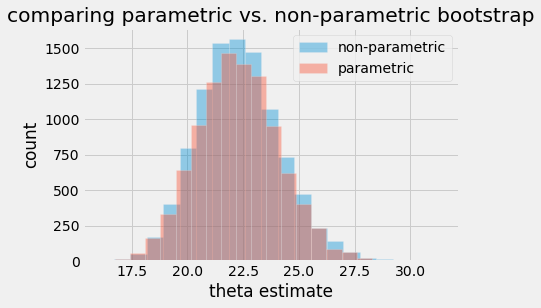

In [60]:
# plot sampling distribution of theta estimated by both non-parametric and parametric bootstrap
plt.hist(np_boot_theta_hat, bins=20, label='non-parametric', alpha=0.4)
plt.hist(boot_theta_hat, bins=20, label='parametric', alpha=0.4)
plt.xlabel('theta estimate')
plt.ylabel('count')
plt.title('comparing parametric vs. non-parametric bootstrap')
plt.legend();

**Bonus Solution**: 

You're done with HW 3!  Be sure to...

* **Save and Checkpoint** from the File menu,
* **Close and Halt** from the File menu,
* **Rename your ipynb file**, replacing with your name,
* **Upload** your file to the course website.